In [1]:
import numpy as np

!python testrun2.py

M = 50
f = 20
Msol = 4.925491025543575903411922162094833998e-6
Omega_0 = M*Msol*np.pi*f
q = 1.5
qs = "15"
chi1 = 0.02
chi2 = 0.01
chi1s = "02"
chi2s = "01"

m1 = q/(1. + q)
m2 = 1./(1. + q)
ap = m1*chi1 + m2*chi2
am = m1*chi1 - m2*chi2
nu = m1*m2

h22_BOB_opt = np.loadtxt(f"h22_v5HMBOBopt_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")
h22_BOB_NQC = np.loadtxt(f"h22_v5HMBOBopt_inspiral_NQC_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat",dtype = np.cdouble)
h22_BOB_noNQC = np.loadtxt(f"h22_v5HMBOBopt_inspiral_no_NQC_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat",dtype = np.cdouble)
dynamics_BOB = np.loadtxt(f"v5HMBOBopt_inspiral_dynamics_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")

h22_BOBunopt = np.loadtxt(f"h22_v5HMcalib_BOB_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")
h22_BOBunopt_NQC = np.loadtxt(f"h22_v5HMcalib_BOB_inspiral_NQC_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat",dtype = np.cdouble)
h22_BOBunopt_noNQC = np.loadtxt(f"h22_v5HMcalib_BOB_inspiral_no_NQC_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat",dtype = np.cdouble)
dynamics_BOBunopt = np.loadtxt(f"our_dynamics_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")


h22_v5HM = np.loadtxt(f"h22_v5HM_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")
dynamics_v5HM = np.loadtxt(f"v5HM_inspiral_dynamics_q_{qs}_chi1_{chi1s}_chi2_{chi2s}.dat")

/mnt/c/Users/sidmahesh/Documents/Github/SEOBNRv5_BOB/V5/Radiation/v5HM_BOB_optimized_merger_ringdown.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  phi = omegaQNM*tau*(-np.arctan2((1.0/2.0)*omegaNR, (1.0/2.0)*omegaQNM) + np.arctan2(tmp10, (1.0/2.0)*omegaQNM)) + 0.5*omegaQNM*tau*np.log((1 - tmp2)*(tmp15 + 1)/((1 - tmp15)*(tmp2 + 1))) - tmp13*(-np.arctan2((1.0/2.0)*omegaNR, tmp12) + np.arctan2(tmp10, tmp12)) - 0.5*tmp13*np.log((1 - tmp16)*(tmp17 + 1)/((1 - tmp17)*(tmp16 + 1)))
/home/siddharth-mahesh/anaconda3/envs/pyseobnr2/lib/python3.9/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/siddharth-mahesh/anaconda3/envs/pyseobnr2/lib/python3.9/site-packages/numpy/lib/function_base.py:1745: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd - interval_low, period) + interval_low


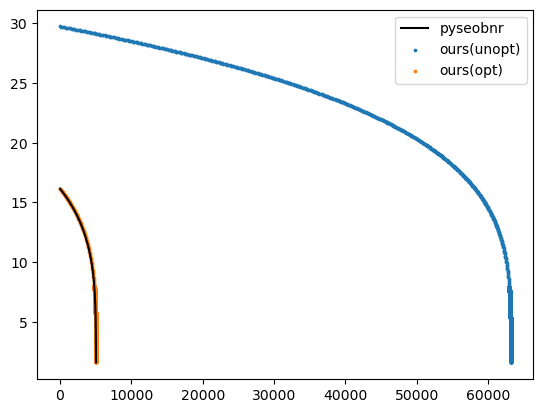

In [2]:
import matplotlib.pyplot as plt

# first plot dynamics

idx_to_plot = 1

plt.plot(dynamics_v5HM[:,0], dynamics_v5HM[:,idx_to_plot],color = 'black',label = 'pyseobnr')
plt.scatter(dynamics_BOBunopt[:,0], dynamics_BOBunopt[:,idx_to_plot],s = (1/72)**(-0.25) , label = 'ours(unopt)')
plt.scatter(dynamics_BOB[:,0], dynamics_BOB[:,idx_to_plot],s = (1/72)**(-0.25) , label = 'ours(opt)')
plt.legend()
# Show the plot
plt.show()

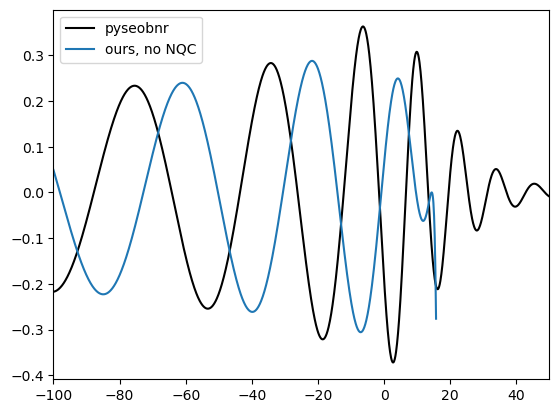

In [3]:
# plot the non-nqc-ed waveform
dT = 2.4627455127717882e-05/M/4.925490947641266978197229498498379006e-6
t_new = np.arange(dynamics_BOB[0,0],dynamics_BOB[-1,0],dT)
plt.plot(h22_v5HM[:,0], h22_v5HM[:,1],color = 'black',label = 'pyseobnr')
plt.plot(t_new - t_new[0] + h22_v5HM[0,0],np.real(h22_BOB_noNQC),label = 'ours, no NQC')
#plt.plot(t_new_BOB - t_new_BOB[0] + h22_v5HM[0,0],np.real(h22_BOBcalibDeltat_noNQC),label = 'ours, BOB Deltat, no NQC')
plt.xlim(-100,50)
plt.legend()
plt.show()


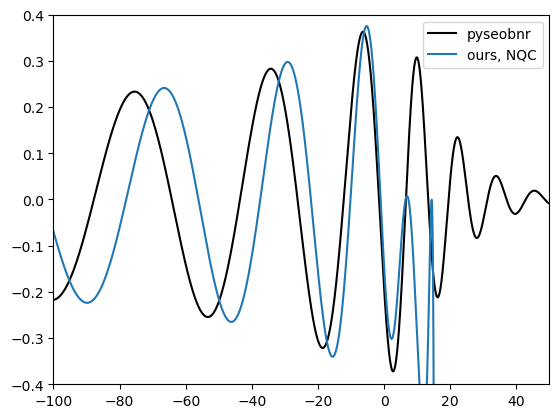

In [4]:
# plot the nqc-ed waveform
dT = 2.4627455127717882e-05/M/4.925490947641266978197229498498379006e-6
t_new = np.arange(dynamics_BOB[0,0],dynamics_BOB[-1,0],dT)
plt.plot(h22_v5HM[:,0], h22_v5HM[:,1],color = 'black',label = 'pyseobnr')
plt.plot(t_new - t_new[0] + h22_v5HM[0,0],np.real(h22_BOB_NQC),label = 'ours, NQC')
plt.xlim(- 100,50)
plt.ylim(-0.4,0.4)
plt.legend()
plt.show()


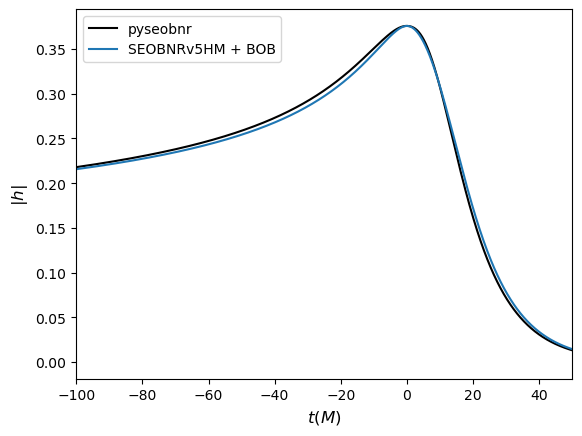

In [5]:
# plot the full waveform amplitude
plt.plot(h22_v5HM[:,0], np.abs(h22_v5HM[:,1] + 1j*h22_v5HM[:,2]),color = 'black',label = 'pyseobnr')
plt.plot(h22_BOB_opt[:,0],np.abs(h22_BOB_opt[:,1] + 1j*h22_BOB_opt[:,2]),label = 'SEOBNRv5HM + BOB')
plt.xlim(-100,50)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$|h|$',fontsize = 12)
plt.legend()
plt.savefig(f"hamp_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


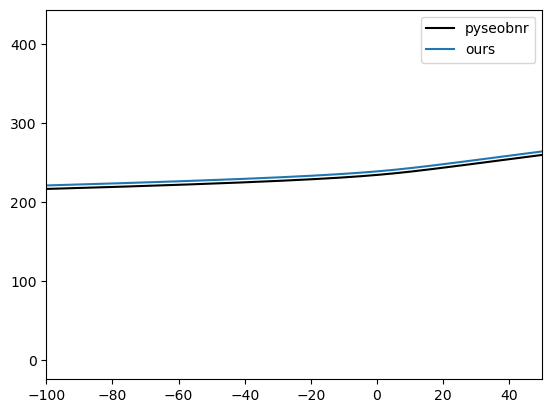

In [6]:
# plot the full waveform phase

plt.plot(h22_v5HM[:,0], np.unwrap(np.angle(h22_v5HM[:,1]+1j*h22_v5HM[:,2])),color = 'black',label = 'pyseobnr')
plt.plot(h22_BOB_opt[:,0],np.unwrap(np.angle(h22_BOB_opt[:,1]+1j*h22_BOB_opt[:,2])),label = 'ours')
plt.xlim(-100,50)
#plt.ylim(1100,1300)
plt.legend()
plt.show()


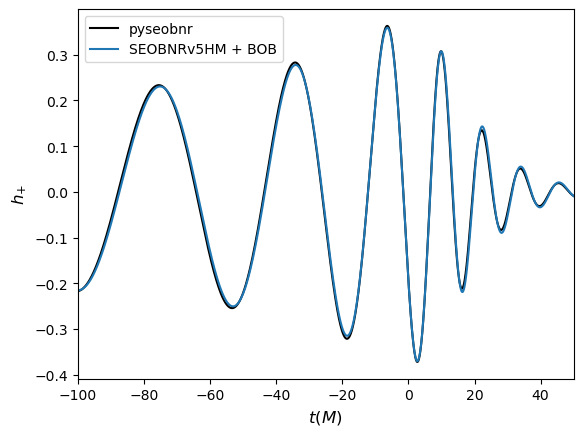

In [7]:
# plot h_+ (match phases at peak)
v5HM_amp = np.abs(h22_v5HM[:,1] - 1j*h22_v5HM[:,2])    
v5HM_phase = np.unwrap(np.angle(h22_v5HM[:,1] - 1j*h22_v5HM[:,2]))

BOB_amp = np.abs(h22_BOB_opt[:,1] - 1j*h22_BOB_opt[:,2])
BOB_phase = np.unwrap(np.angle(h22_BOB_opt[:,1] - 1j*h22_BOB_opt[:,2]))
BOB_idx_phase_match = np.argmin(np.abs(h22_BOB_opt[:,0]))

#BOBcalibDeltat_amp = np.abs(h22_BOBcalibDeltat_calib[:,1] - 1j*h22_BOBcalibDeltat_calib[:,2])
#BOBcalibDeltat_phase = np.unwrap(np.angle(h22_BOBcalibDeltat_calib[:,1] - 1j*h22_BOBcalibDeltat_calib[:,2]))
#BOBcalibDeltat_idx_phase_match = np.argmin(np.abs(h22_BOBcalibDeltat_calib[:,0]))


BOB_v5HM_phase_match = np.interp(h22_BOB_opt[:,0],h22_v5HM[:,0],v5HM_phase)[BOB_idx_phase_match]
BOB_phase = BOB_phase - BOB_phase[BOB_idx_phase_match] + BOB_v5HM_phase_match

#BOBcalibDeltat_v5HM_phase_match = np.interp(h22_BOBcalibDeltat_calib[:,0],h22_v5HM[:,0],v5HM_phase)[BOBcalibDeltat_idx_phase_match]
#BOBcalibDeltat_phase = BOBcalibDeltat_phase - BOBcalibDeltat_phase[BOBcalibDeltat_idx_phase_match] + BOBcalibDeltat_v5HM_phase_match

h22_BOB_plus = BOB_amp*np.cos(BOB_phase)
h22_BOB_cross = BOB_amp*np.sin(-1*BOB_phase)

#h22_BOBcalibDeltat_plus = BOBcalibDeltat_amp*np.cos(BOBcalibDeltat_phase)
#h22_BOBcalibDeltat_cross = BOBcalibDeltat_amp*np.sin(-1*BOBcalibDeltat_phase)

plt.plot(h22_v5HM[:,0],h22_v5HM[:,1],color = 'black',label = 'pyseobnr')
plt.plot(h22_BOB_opt[:,0],h22_BOB_plus,label = 'SEOBNRv5HM + BOB')
#plt.plot(h22_BOB_calib[:,0],h22_BOB_calib[:,1],label = 'SEOBNRv5HM + BOB')
#plt.plot(h22_BOBcalibDeltat_calib[:,0],h22_BOBcalibDeltat_plus,label = 'ours, BOB Deltat')
plt.xlim(-100,50)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$h_{+}$',fontsize = 12)
plt.legend()
plt.savefig(f"hplus_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


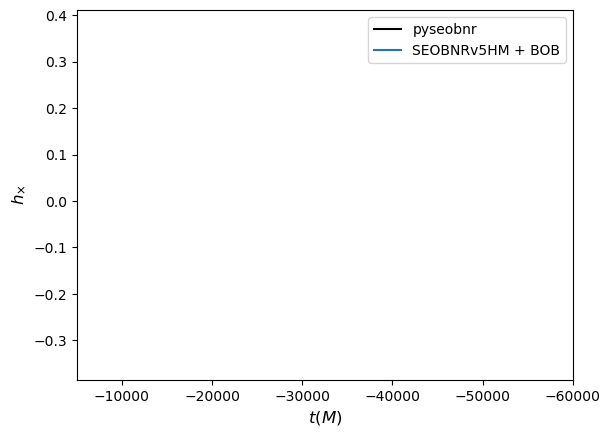

In [8]:
# plot h_x (match phases at peak)

plt.plot(h22_v5HM[:,0],h22_v5HM[:,2],color = 'black',label = 'pyseobnr')
plt.plot(h22_BOB_opt[:,0],h22_BOB_cross,label = 'SEOBNRv5HM + BOB')
#plt.plot(h22_BOBcalibDeltat_calib[:,0],h22_BOBcalibDeltat_cross,label = 'ours, BOB Deltat')
plt.xlim(h22_v5HM[0,0],-60000)
plt.legend()
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$h_{\times}$',fontsize = 12)
plt.savefig(f"hcross_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


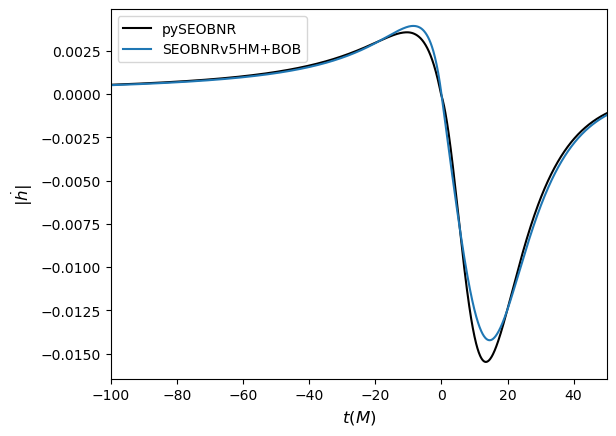

In [9]:
# Amplitude derivatives
BOB_damp = np.gradient(BOB_amp, h22_BOB_opt[:,0])
#BOBcalibDeltat_damp = np.gradient(BOBcalibDeltat_amp, h22_BOBcalibDeltat_calib[:,0])
v5HM_damp = np.gradient(v5HM_amp,h22_v5HM[:,0])
plt.plot(h22_v5HM[:,0],v5HM_damp,label = 'pySEOBNR',color = 'black')
plt.plot(h22_BOB_opt[:,0],BOB_damp,label = 'SEOBNRv5HM+BOB')
#plt.plot(h22_BOBcalibDeltat_calib[:,0],BOBcalibDeltat_damp,label = 'SEOBNRv5HM+BOB(calib Deltat)')
plt.xlim(-100,50)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$\dot{|h|}$',fontsize = 12)
plt.legend()
plt.savefig(f"hdamp_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


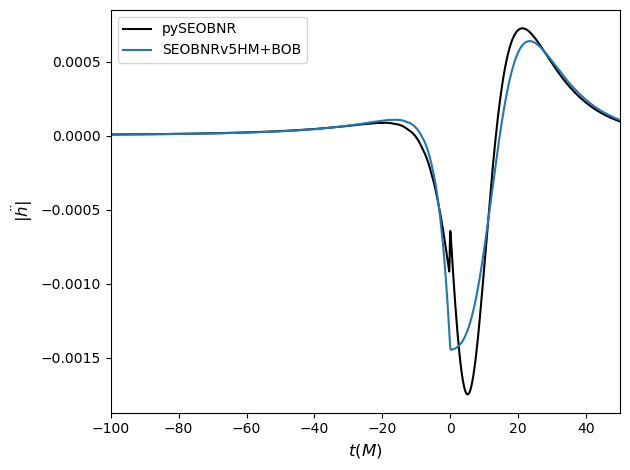

In [10]:
BOB_ddamp = np.gradient(BOB_damp, h22_BOB_opt[:,0])
v5HM_ddamp = np.gradient(v5HM_damp,h22_v5HM[:,0])
plt.plot(h22_v5HM[:,0],v5HM_ddamp,label = 'pySEOBNR',color = 'black')
plt.plot(h22_BOB_opt[:,0],BOB_ddamp,label = 'SEOBNRv5HM+BOB')
plt.xlim(-100,50)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$\ddot{|h|}$',fontsize = 12)
plt.legend()
plt.tight_layout()
plt.savefig(f"hddamp_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


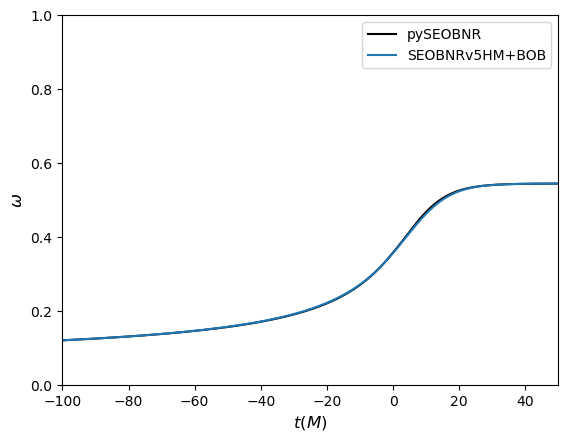

In [11]:
# Phase derivatives

BOB_dphi = np.gradient(np.abs(BOB_phase), h22_BOB_opt[:,0])
v5HM_dphi = np.gradient(np.abs(v5HM_phase),h22_v5HM[:,0])
plt.plot(h22_v5HM[:,0],v5HM_dphi,label = 'pySEOBNR',color = 'black')
plt.plot(h22_BOB_opt[:,0],BOB_dphi,label = 'SEOBNRv5HM+BOB')
plt.xlim(-100,50)
plt.ylim(0,1)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$\omega$',fontsize = 12)
plt.legend()
plt.savefig(f"hfreq_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


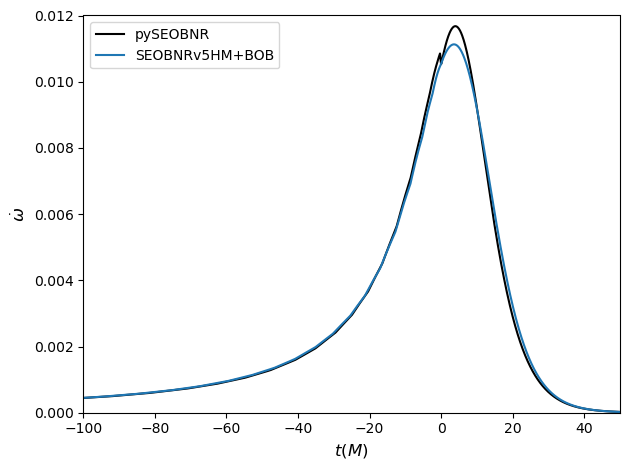

In [12]:
BOB_ddphi = np.gradient(BOB_dphi, h22_BOB_opt[:,0])
v5HM_ddphi = np.gradient(v5HM_dphi,h22_v5HM[:,0])
plt.plot(h22_v5HM[:,0],v5HM_ddphi,label = 'pySEOBNR',color = 'black')
plt.plot(h22_BOB_opt[:,0],BOB_ddphi,label = 'SEOBNRv5HM+BOB')
plt.xlim(-100,50)
plt.ylim(0,0.012)
plt.xlabel(r'$t(M)$',fontsize = 12)
plt.ylabel(r'$\dot{\omega}$',fontsize = 12)
plt.legend()
plt.tight_layout()
plt.savefig(f"hdfreq_comparison_q_{qs}_chi1_{chi1s}_chi2_{chi2s}")
plt.show()


In [21]:
import kuibit.timeseries as kuibit_ts
import kuibit.gw_mismatch as kuibit_mismatch

h22_v5HM_complex = h22_v5HM[:,1] - 1j*h22_v5HM[:,2]
h22_v5HM_ts = kuibit_ts.TimeSeries(h22_v5HM[:,0],h22_v5HM_complex)
h22_BOB_plus_new = np.interp(h22_v5HM[:,0],h22_BOB_opt[:,0],h22_BOB_plus)
h22_BOB_cross_new = np.interp(h22_v5HM[:,0],h22_BOB_opt[:,0],h22_BOB_cross)
h22_BOB_complex = h22_BOB_plus - 1j*h22_BOB_cross
h22_BOB_ts = kuibit_ts.TimeSeries(h22_BOB_opt[:,0],h22_BOB_complex)
mm = kuibit_mismatch.mismatch_from_strains(h22_v5HM_ts,h22_BOB_ts)
print(mm)

(nan, (0.0, 0.0))
